In [8]:
%load_ext autoreload
%autoreload 2

# Get parent directory and add to sys.path
import os
import sys

parent_dir = os.path.dirname(os.getcwd())
sys.path.append(parent_dir)

# Require ipympl
%matplotlib widget 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
# MPC import
import numpy as np
from LinearMPC_template.MPCVelControl import MPCVelControl
from src.rocket import Rocket
from src.vel_rocket_vis import RocketVis

rocket_obj_path = os.path.join(parent_dir, "Cartoon_rocket.obj")
rocket_params_path = os.path.join(parent_dir, "rocket.yaml")


In [10]:
Ts = 0.05
sim_time = 20
H = 10
x0 = np.zeros(12) # initial state
x0[5] = 40  # roll 
x0[6] = 5.0  # initial vx
x0[7] = 5.0  # initial vy
x0[8] = 5.0  # initial vz# initial wy
#on doit changer un des parametres de xo pour mettre une vitesse dans la direction voulue 
# X -> Xo(6) = Vx, Y-> XO(7) = Vy, Z-> Xo(8) = Vz

rocket = Rocket(Ts=Ts, model_params_filepath=rocket_params_path)
mpc = MPCVelControl().new_controller(rocket, Ts, H)

t_cl, x_cl, u_cl, t_ol, x_ol, u_ol, _ = rocket.simulate_control(
    mpc, sim_time, H, x0, method="linear"
)


vis = RocketVis(rocket, rocket_obj_path)
vis.anim_rate = 1.0
vis.animate(t_cl[:-1], x_cl[:, :-1], u_cl, T_ol=t_ol[..., :-1], X_ol=x_ol, U_ol=u_ol);

Simulating time 0.00: 
 Input Pdiff violation: 40.00 > 20.00, 

ValueError: Constraints violation detected, terminating...

In [ ]:
from LinearMPC_template.MPCControl_xvel import MPCControl_xvel
xs, us = rocket.trim()
A, B = rocket.linearize(xs, us)
mpc_x = MPCControl_xvel(A, B, xs, us, Ts, H) # Full 12x12 A and 12x4 B matrices
x0_sub = x0[mpc_x.x_ids]   # shape (3,)
u0, x_traj, u_traj = mpc_x.get_u(x0_sub)


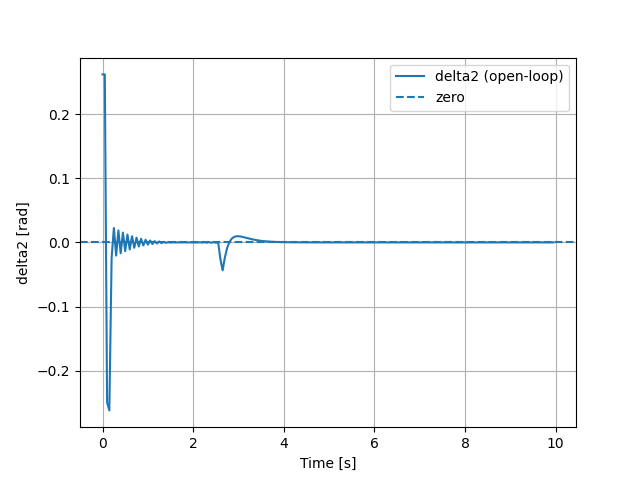

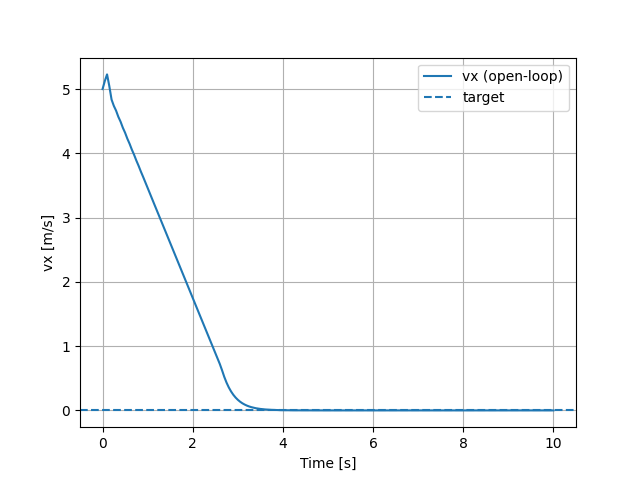

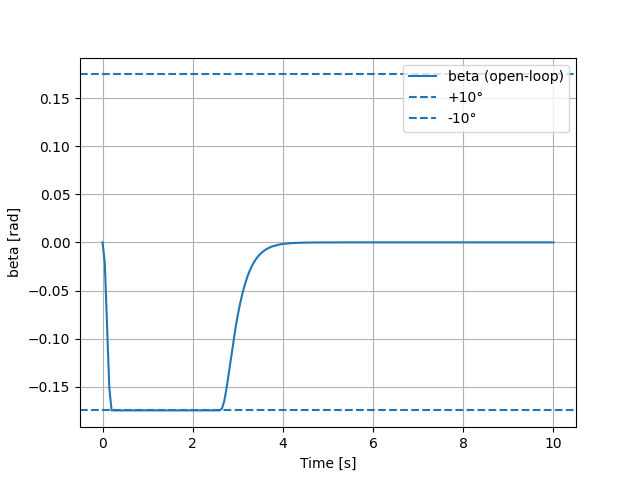

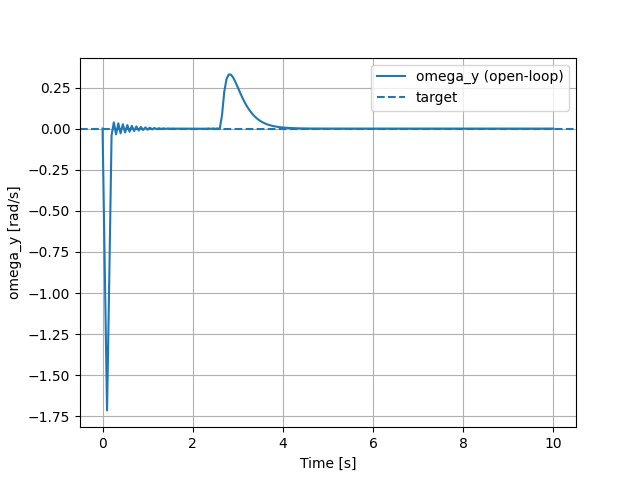

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_x_open_loop(mpc_x, x_traj, u_traj):
    Ts = mpc_x.Ts
    N = mpc_x.N
    t_x = np.arange(N + 1) * Ts
    t_u = np.arange(N) * Ts

    omega_y = x_traj[0, :]
    beta    = x_traj[1, :]
    vx      = x_traj[2, :]
    delta2  = u_traj[0, :]

    beta_max = np.deg2rad(10.0)

    plt.figure()
    plt.plot(t_x, vx, label="vx (open-loop)")
    plt.axhline(0.0, linestyle="--", label="target")
    plt.xlabel("Time [s]")
    plt.ylabel("vx [m/s]")
    plt.grid(True)
    plt.legend()

    plt.figure()
    plt.plot(t_x, beta, label="beta (open-loop)")
    plt.axhline(+beta_max, linestyle="--", label="+10°")
    plt.axhline(-beta_max, linestyle="--", label="-10°")
    plt.xlabel("Time [s]")
    plt.ylabel("beta [rad]")
    plt.grid(True)
    plt.legend()

    plt.figure()
    plt.plot(t_x, omega_y, label="omega_y (open-loop)")
    plt.axhline(0.0, linestyle="--", label="target")
    plt.xlabel("Time [s]")
    plt.ylabel("omega_y [rad/s]")
    plt.grid(True)
    plt.legend()

    plt.figure()
    plt.plot(t_u, delta2, label="delta2 (open-loop)")
    plt.axhline(0.0, linestyle="--", label="zero")
    plt.xlabel("Time [s]")
    plt.ylabel("delta2 [rad]")
    plt.grid(True)
    plt.legend()

# call it
plot_x_open_loop(mpc_x, x_traj, u_traj)
plt.show()


In [ ]:
from LinearMPC_template.MPCControl_yvel import MPCControl_yvel
xs, us = rocket.trim()
A, B = rocket.linearize(xs, us)
mpc_y = MPCControl_yvel(A, B, xs, us, Ts, H) # Full 12x12 A and 12x4 B matrices
x0_sub = x0[mpc_y.x_ids]   # shape (3,)
u0, x_traj, u_traj = mpc_y.get_u(x0_sub)

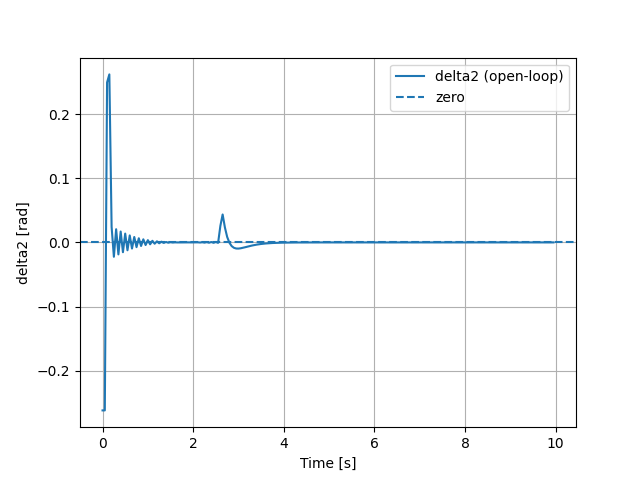

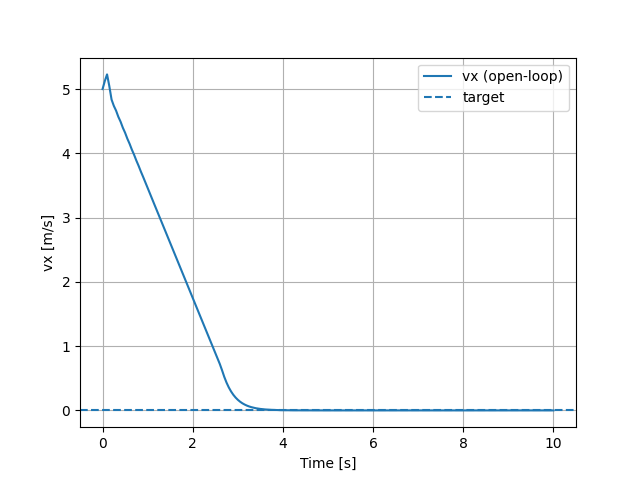

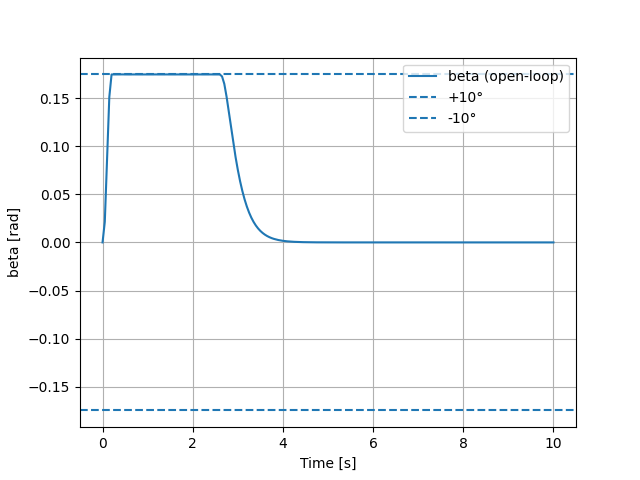

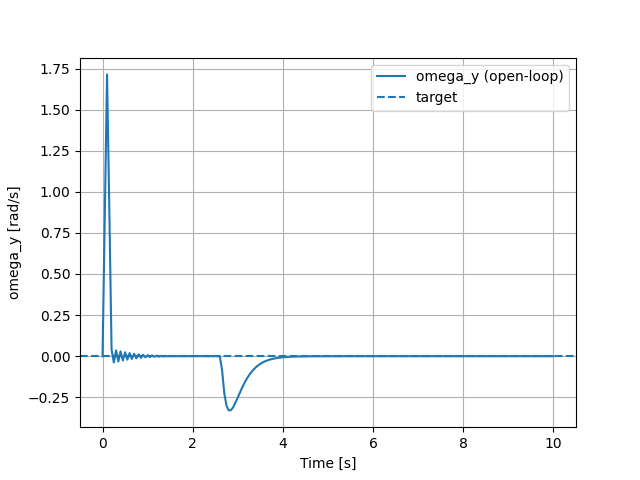

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_y_open_loop(mpc_y, x_traj, u_traj):
    Ts = mpc_y.Ts
    N = mpc_y.N
    t_x = np.arange(N + 1) * Ts
    t_u = np.arange(N) * Ts

    omega_y = x_traj[0, :]
    beta    = x_traj[1, :]
    vx      = x_traj[2, :]
    delta2  = u_traj[0, :]

    beta_max = np.deg2rad(10.0)

    plt.figure()
    plt.plot(t_x, vx, label="vx (open-loop)")
    plt.axhline(0.0, linestyle="--", label="target")
    plt.xlabel("Time [s]")
    plt.ylabel("vx [m/s]")
    plt.grid(True)
    plt.legend()

    plt.figure()
    plt.plot(t_x, beta, label="beta (open-loop)")
    plt.axhline(+beta_max, linestyle="--", label="+10°")
    plt.axhline(-beta_max, linestyle="--", label="-10°")
    plt.xlabel("Time [s]")
    plt.ylabel("beta [rad]")
    plt.grid(True)
    plt.legend()

    plt.figure()
    plt.plot(t_x, omega_y, label="omega_y (open-loop)")
    plt.axhline(0.0, linestyle="--", label="target")
    plt.xlabel("Time [s]")
    plt.ylabel("omega_y [rad/s]")
    plt.grid(True)
    plt.legend()

    plt.figure()
    plt.plot(t_u, delta2, label="delta2 (open-loop)")
    plt.axhline(0.0, linestyle="--", label="zero")
    plt.xlabel("Time [s]")
    plt.ylabel("delta2 [rad]")
    plt.grid(True)
    plt.legend()

# call it
plot_x_open_loop(mpc_x, x_traj, u_traj)
plt.show()


In [ ]:
from LinearMPC_template.MPCControl_zvel import MPCControl_zvel
xs, us = rocket.trim()
A, B = rocket.linearize(xs, us)
mpc_z = MPCControl_zvel(A, B, xs, us, Ts, H) # Full 12x12 A and 12x4 B matrices
x0_sub = x0[mpc_z.x_ids]   # shape (3,)
u0, x_traj, u_traj = mpc_z.get_u(x0_sub)

u_traj min/max: 66.66666547872445 66.66666656686174
mpc_z.us: [66.66666667]


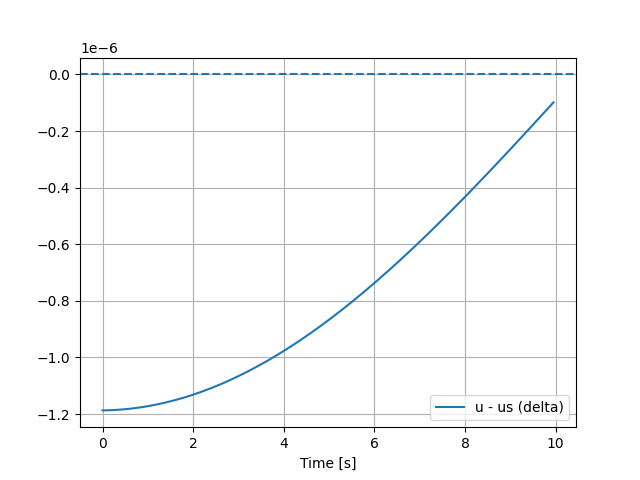

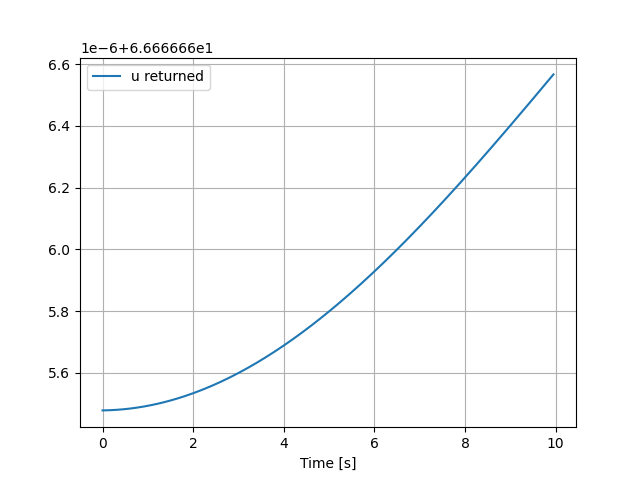

In [ ]:
# u_traj is what your get_u returns
# check if it's delta or absolute
print("u_traj min/max:", u_traj.min(), u_traj.max())
print("mpc_z.us:", mpc_z.us)

u_abs = u_traj  # if already absolute
u_delta = u_traj - mpc_z.us.reshape(-1,1)

import matplotlib.pyplot as plt
t_u = np.arange(mpc_z.N) * mpc_z.Ts

plt.figure()
plt.plot(t_u, u_traj[0,:], label="u returned")
plt.legend(); plt.grid(True); plt.xlabel("Time [s]")

plt.figure()
plt.plot(t_u, u_delta[0,:], label="u - us (delta)")
plt.axhline(0, linestyle="--")
plt.legend(); plt.grid(True); plt.xlabel("Time [s]")
plt.show()


In [11]:
from LinearMPC_template.MPCControl_roll import MPCControl_roll
import numpy as np

xs, us = rocket.trim()
A, B = rocket.linearize(xs, us)

mpc_roll = MPCControl_roll(A, B, xs, us, Ts, H)

# subsystem initial state
x0_sub = x0[mpc_roll.x_ids].copy()

# subsystem target: same as trim, except alpha (full-state index 3) -> 30°
xT_sub = mpc_roll.xs.copy()
if 3 in mpc_roll.x_ids:
    i_alpha = int(np.where(mpc_roll.x_ids == 3)[0][0])   # position of alpha inside subsystem state
    xT_sub[i_alpha] = np.deg2rad(30.0)

# input target: keep trim
uT_sub = mpc_roll.us.copy()

u0, x_traj, u_traj = mpc_roll.get_u(x0_sub, x_target=xT_sub, u_target=uT_sub)


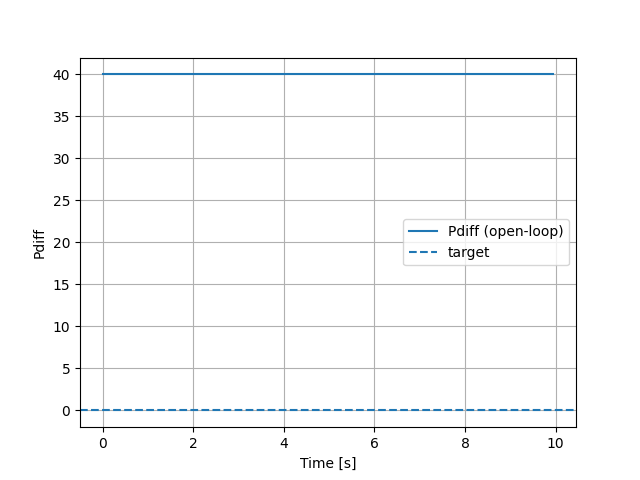

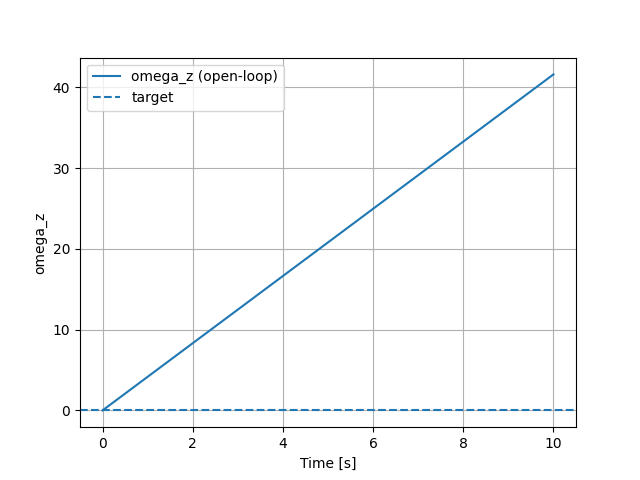

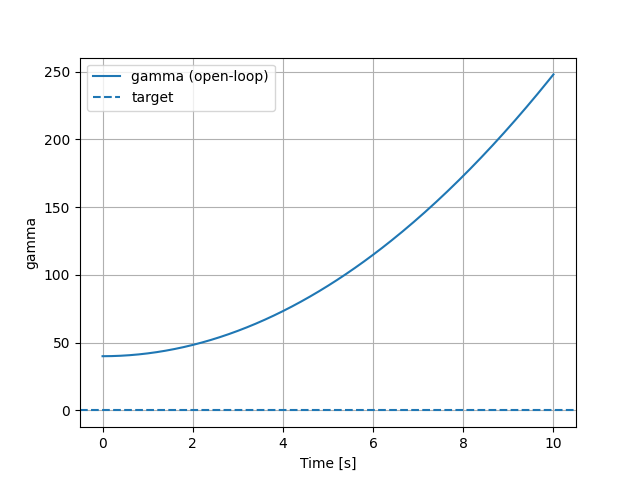

In [12]:
import matplotlib.pyplot as plt
import numpy as np

def plot_roll_open_loop(mpc, x_traj, u_traj, x_target=None, u_target=None):
    Ts, N = mpc.Ts, mpc.N
    t_x = np.arange(N+1) * Ts
    t_u = np.arange(N) * Ts

    id_to_name = {
        0: "omega_x", 1: "omega_y", 2: "omega_z",
        3: "alpha (roll)", 4: "beta", 5: "gamma",
        6: "vx", 7: "vy", 8: "vz",
        9: "x", 10: "y", 11: "z",
    }
    u_to_name = {0:"delta1", 1:"delta2", 2:"Pavg", 3:"Pdiff"}

    # states
    for i, full_id in enumerate(mpc.x_ids):
        plt.figure()
        plt.plot(t_x, x_traj[i,:], label=f"{id_to_name[int(full_id)]} (open-loop)")
        if x_target is not None:
            plt.axhline(float(x_target[i]), linestyle="--", label="target")
        plt.xlabel("Time [s]")
        plt.ylabel(id_to_name[int(full_id)])
        plt.grid(True)
        plt.legend()

    # inputs
    for j, full_uid in enumerate(mpc.u_ids):
        plt.figure()
        plt.plot(t_u, u_traj[j,:], label=f"{u_to_name[int(full_uid)]} (open-loop)")
        if u_target is not None:
            plt.axhline(float(u_target[j]), linestyle="--", label="target")
        plt.xlabel("Time [s]")
        plt.ylabel(u_to_name[int(full_uid)])
        plt.grid(True)
        plt.legend()

    plt.show()

plot_roll_open_loop(mpc_roll, x_traj, u_traj, x_target=xT_sub, u_target=uT_sub)


In [ ]:
import inspect
from mpt4py import Polyhedron
print(Polyhedron)
print(inspect.signature(Polyhedron))
print([m for m in dir(Polyhedron) if "proj" in m.lower() or "plot" in m.lower()])


<class 'mpt4py.geometry.polyhedron.Polyhedron'>
(H: Optional[mpt4py.base.HData] = None, V: Optional[mpt4py.base.VData] = None)
['plot', 'project', 'projection']
